In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
# Reading the CSV
df = pd.read_csv('fcc-forum-pageviews.csv')


# Clean Data before setting index to date
mask_clean = (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))
df = df[mask_clean]
df = df.set_index('date')
df.index = pd.to_datetime(df.index)



def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize = (12,6))

    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.plot(df.index, df['value'], color = 'red')


    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig



def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar1 = df.copy()
    df_bar1['Month'] = df.index.month
    df_bar1['Year'] = df.index.year

    df_bar = df_bar1.groupby([df_bar1['Year'], df_bar1['Month']], sort = False)['value'].agg(np.mean).round()
    df_bar = df_bar.reset_index()

    df_bar_piv = pd.pivot_table(df_bar, values = 'value', index = 'Year', columns= 'Month')

    # Draw bar plot
    ax = df_bar_piv.plot(kind = 'bar', figsize= (12,6))
    fig = ax.get_figure()


    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
    title = 'Months')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig



def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(20,12)

    # Plots
    ax1 = (sns.boxplot(df_box['year'], df_box['value'], ax = ax[0]))
    ax2 = (sns.boxplot(x= df_box['month'], y= df_box['value'], ax = ax[1], order= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']))

    # Titles and labels
    ax[0].set_title('Year-wise Box Plot (Trend)')
    ax[1].set_title('Month-wise Box Plot (Seasonality)')
    ax1.set(xlabel= 'Year', ylabel= 'Page Views')
    ax2.set(xlabel= 'Month', ylabel= 'Page Views')


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig


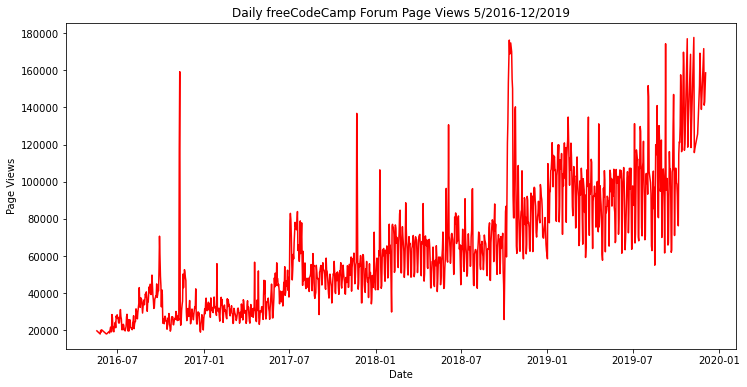

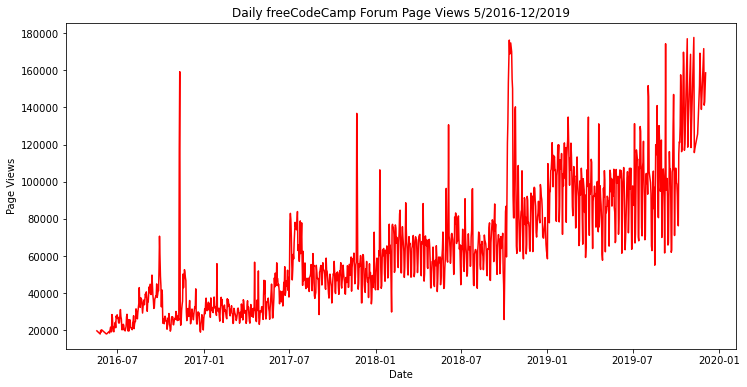

In [27]:
draw_line_plot()

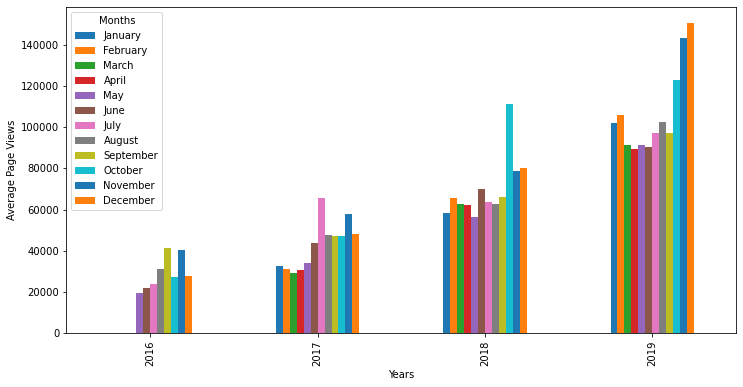

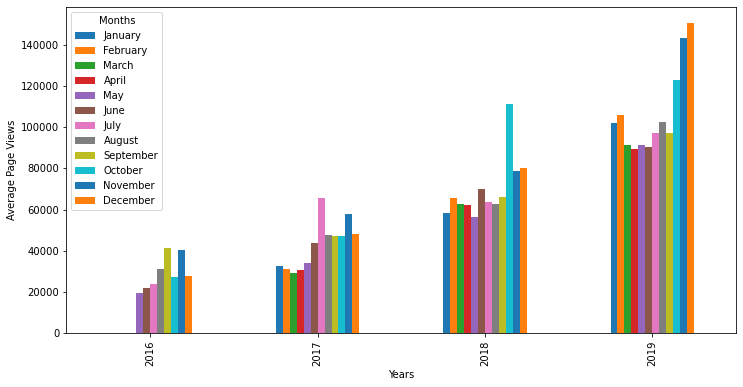

In [28]:
draw_bar_plot()

/Users/emilsieciechowicz/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


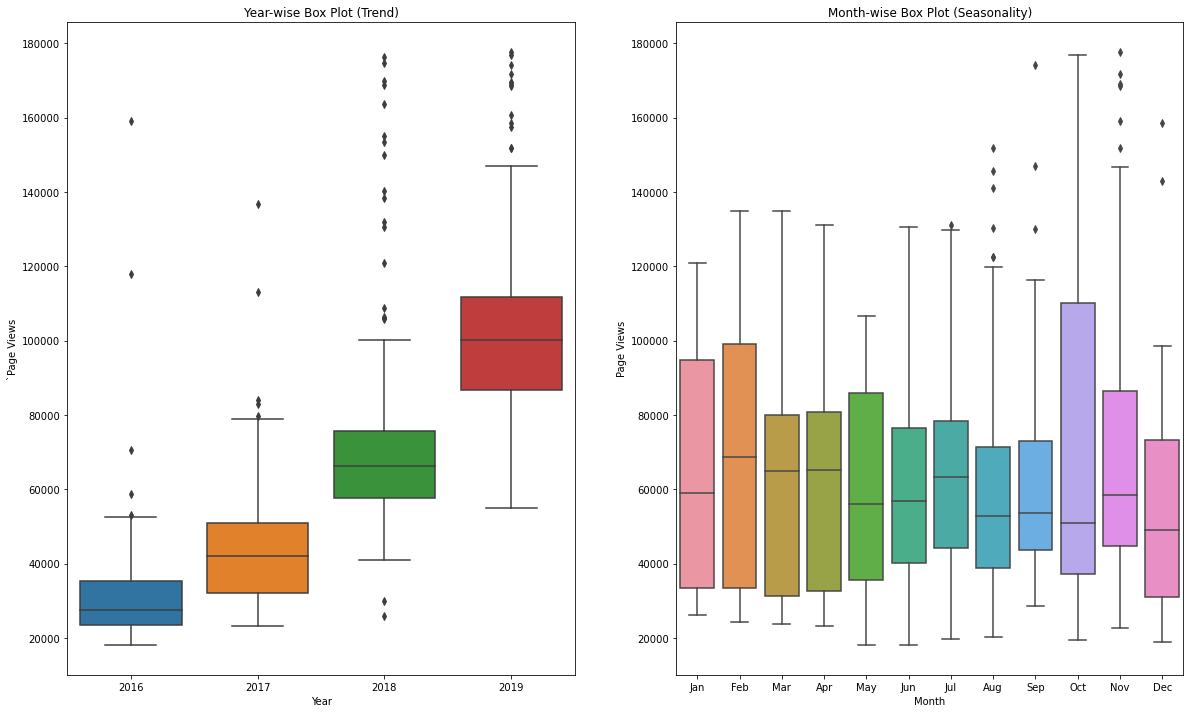

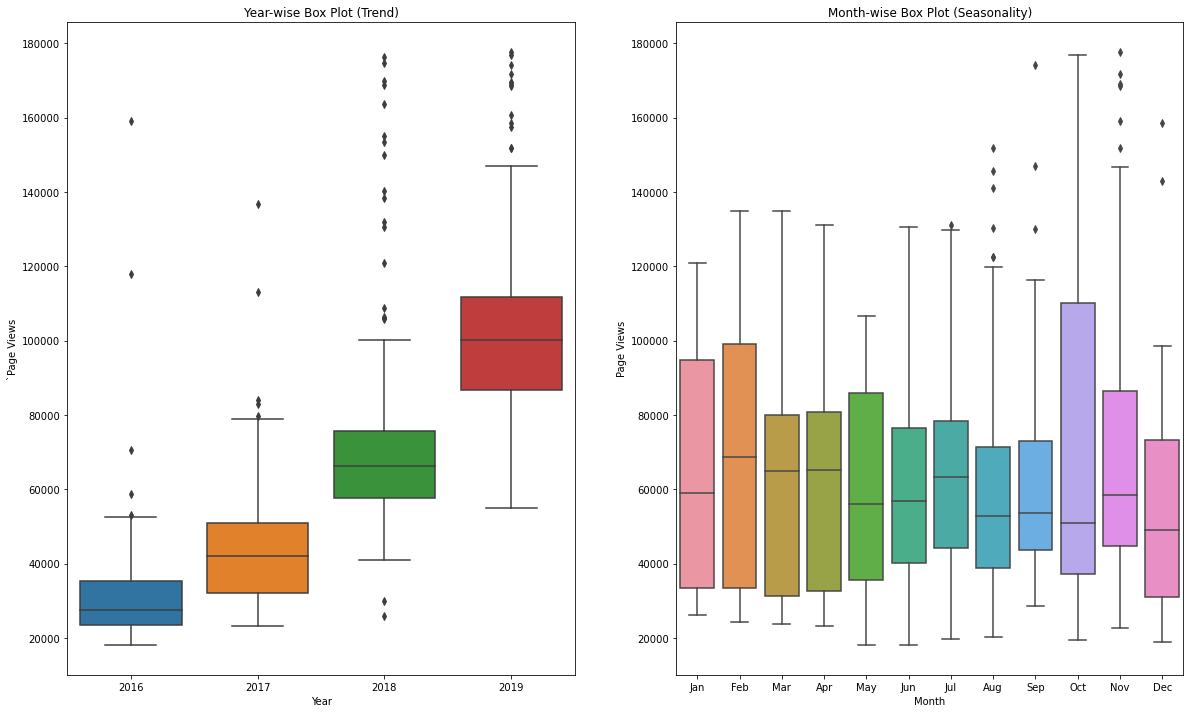

In [29]:
draw_box_plot()